In [1]:
# Add the path to the Utils folder
import sys
import tensorflow as tf
sys.path.append('../Utils')

This notebook provide every step that is needed for the train.py script to train a new model

# Step 1 - Prepare Input Data with Script

- use /Utils/prepareInputData.py for this step
- this will provide a folder "Data" and a train (80%), validate (10%), and test (10%) split
- each dataset is separated in "sat" folder with images and "gt" folder with mask

# Step 2 - Resample Data

In [1]:
import os
from PIL import Image
from tqdm import tqdm

def resample_folder(input_folder, output_folder, target_size=(128, 128)):
    """
    Resample images in the input folder and save them to the output folder.

    Parameters:
    - input_folder (str): Path to the input folder containing images.
    - output_folder (str): Path to the output folder to save resampled images.
    - target_size (tuple): Target size for resampling, e.g., (width, height).
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of files in the input folder
    file_list = os.listdir(input_folder)

    # Process each file and save the resampled version
    for file_name in tqdm(file_list, desc="Resampling", unit="file"):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)

        # Open the image
        img = Image.open(input_path)

        # Resize the image to the desired dimensions
        resampled_img = img.resize(target_size, Image.LANCZOS)

        # Save the resampled image
        resampled_img.save(output_path)

    print(f"Resampling completed for {input_folder}.")

In [2]:
DATA_FOLDER = './../Data50'
RESAMPLED_FOLDER = './../Data50_resampled_128'
TRAIN_SAT_FOLDER = os.path.join(DATA_FOLDER, 'train/sat')
TRAIN_GT_FOLDER = os.path.join(DATA_FOLDER, 'train/gt')
VALIDATE_SAT_FOLDER = os.path.join(DATA_FOLDER, 'validate/sat')
VALIDATE_GT_FOLDER = os.path.join(DATA_FOLDER, 'validate/gt')
TEST_SAT_FOLDER = os.path.join(DATA_FOLDER, 'test/sat')
TEST_GT_FOLDER = os.path.join(DATA_FOLDER, 'test/gt')

# Resample train data
resample_folder(TRAIN_SAT_FOLDER, os.path.join(RESAMPLED_FOLDER, 'train/sat'), target_size=(128, 128))
resample_folder(TRAIN_GT_FOLDER, os.path.join(RESAMPLED_FOLDER, 'train/gt'), target_size=(128, 128))

# Resample validate data
resample_folder(VALIDATE_SAT_FOLDER, os.path.join(RESAMPLED_FOLDER, 'validate/sat'), target_size=(128, 128))
resample_folder(VALIDATE_GT_FOLDER, os.path.join(RESAMPLED_FOLDER, 'validate/gt'), target_size=(128, 128))

# Resample test data
resample_folder(TEST_SAT_FOLDER, os.path.join(RESAMPLED_FOLDER, 'test/sat'), target_size=(128, 128))
resample_folder(TEST_GT_FOLDER, os.path.join(RESAMPLED_FOLDER, 'test/gt'), target_size=(128, 128))

Resampling:   0%|          | 0/432 [00:00<?, ?file/s]

Resampling: 100%|██████████| 432/432 [00:03<00:00, 119.92file/s]


Resampling completed for ./../Data50\train/sat.


Resampling: 100%|██████████| 432/432 [00:01<00:00, 256.74file/s]


Resampling completed for ./../Data50\train/gt.


Resampling: 100%|██████████| 81/81 [00:00<00:00, 122.68file/s]


Resampling completed for ./../Data50\validate/sat.


Resampling: 100%|██████████| 72/72 [00:00<00:00, 246.68file/s]


Resampling completed for ./../Data50\validate/gt.


Resampling: 100%|██████████| 63/63 [00:00<00:00, 119.84file/s]


Resampling completed for ./../Data50\test/sat.


Resampling: 100%|██████████| 72/72 [00:00<00:00, 234.98file/s]

Resampling completed for ./../Data50\test/gt.


# Step 3 - Filter Data

In [3]:
import os
import numpy as np
from PIL import Image

def filter_data_by_class(folder, class_name, threshold_percent):
    sat_folder = os.path.join(folder, "sat")
    gt_folder = os.path.join(folder, "gt")

    filtered_sat_files = []
    filtered_gt_files = []

    for filename in os.listdir(gt_folder):
        if filename.endswith(".tif") and filename.startswith("gt_"):
            gt_path = os.path.join(gt_folder, filename)
            sat_path = os.path.join(sat_folder, filename.replace("gt_", "sat_"))

            # Load ground truth mask
            gt_mask = np.array(Image.open(gt_path))

            # Calculate the percentage of the specified class
            class_percent = np.sum(gt_mask == class_name) / gt_mask.size * 100.0

            # Check if the class percentage is below the threshold
            if class_percent <= threshold_percent:
                filtered_gt_files.append(gt_path)
                filtered_sat_files.append(sat_path)

    return filtered_sat_files, filtered_gt_files

In [4]:
import os
import shutil

def copy_files_to_folder_structure(filtered_sat_files, filtered_gt_files, destination_folder):
    os.makedirs(os.path.join(destination_folder, "sat"), exist_ok=True)
    os.makedirs(os.path.join(destination_folder, "gt"), exist_ok=True)

    for source_file in filtered_sat_files:
        destination_path = os.path.join(destination_folder, "sat", os.path.basename(source_file))
        shutil.copyfile(source_file, destination_path)

    for source_file in filtered_gt_files:
        destination_path = os.path.join(destination_folder, "gt", os.path.basename(source_file))
        shutil.copyfile(source_file, destination_path)

In [25]:
data_folder = "./../Data50_resampled_128/train/"
class_name = 0
threshold_percent = 20  # Change this to the desired threshold
filtered_sat_files, filtered_gt_files = filter_data_by_class(data_folder, class_name, threshold_percent)

destination_folder = f"./../Data50_res128_filtered_{threshold_percent}/train/"
copy_files_to_folder_structure(filtered_sat_files, filtered_gt_files, destination_folder)

# Define the path to the training ground truth folder
#gt_folder = f"./../Data_filtered_{threshold_percent}/train/gt/"
# Visualize the class distribution from a random subset of ground truth files
#visualize_class_distribution(gt_folder, num_samples=9000, title=f"Class Distribution for training data with threshold {threshold_percent}")

In [26]:
data_folder = "./../Data50_resampled_128/validate/"
class_name = 0
threshold_percent = 20  # Change this to the desired threshold
filtered_sat_files, filtered_gt_files = filter_data_by_class(data_folder, class_name, threshold_percent)

destination_folder = f"./../Data50_res128_filtered_{threshold_percent}/validate/"
copy_files_to_folder_structure(filtered_sat_files, filtered_gt_files, destination_folder)

# Define the path to the training ground truth folder
#gt_folder = f"./../Data_filtered_{threshold_percent}/validate/gt/"
# Visualize the class distribution from a random subset of ground truth files
#visualize_class_distribution(gt_folder, num_samples=9000, title=f"Class Distribution for training data with threshold {threshold_percent}")

# Step 4 - Model Training (input_size = (128, 128, 3))

In [27]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.losses import Loss
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = 5
input_size = (128, 128, 3)
batch_size = 1  # You can adjust this based on your available memory
epochs = 25
train_sat_folder = "./../Data50_res128_filtered_20/train/sat/"
train_gt_folder = "./../Data50_res128_filtered_20/train/gt/"

val_sat_folder = "./../Data50_res128_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res128_filtered_20/validate/gt/"

# Function to load and preprocess the dataset
def load_data(sat_folder, gt_folder, batch_size=batch_size):
    input_images = []
    output_masks = []

    filenames = [filename for filename in os.listdir(sat_folder) if filename.endswith(".tif")]
    num_batches = len(filenames) // batch_size

    for batch_idx in tqdm(range(num_batches), desc="Loading batches", unit="batch"):
        batch_filenames = filenames[batch_idx * batch_size : (batch_idx + 1) * batch_size]
        
        batch_inputs = []
        batch_outputs = []
        for filename in batch_filenames:
            input_path = os.path.join(sat_folder, filename)
            output_path = os.path.join(gt_folder, filename.replace("sat_", "gt_"))

            # Load and preprocess input image
            input_image = np.array(Image.open(input_path)) / 255.0  # Normalize to [0, 1]
            batch_inputs.append(input_image)

            # Load and preprocess output mask
            output_mask = np.array(Image.open(output_path))

            # Ensure that class indices are within the range [0, num_classes-1]
            output_mask = np.clip(output_mask, 0, num_classes - 1)
            output_mask = keras.utils.to_categorical(output_mask, num_classes=num_classes)
            batch_outputs.append(output_mask)

        input_images.append(np.array(batch_inputs))
        output_masks.append(np.array(batch_outputs))

    return np.vstack(input_images), np.vstack(output_masks)

# Load and preprocess the training dataset
X_train, y_train = load_data(train_sat_folder, train_gt_folder)

# Load and preprocess the validation dataset
X_val, y_val = load_data(val_sat_folder, val_gt_folder)

def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.5)(p)
   return f, p

def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.5)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)
   return x

# Define U-Net model for 5 classes
def unet_model(input_size=(128, 128, 3), num_classes=5):
    inputs = keras.Input(input_size)
    
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    # outputs
    outputs = layers.Conv2D(num_classes, 1, padding="same", activation = "softmax")(u9)
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model

class_weight = {0: .59, 1: .32, 2: .06, 3: .02, 4: .01}

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),
      keras.metrics.CategoricalCrossentropy(name='cat_cross_entropy'),
      keras.metrics.MeanIoU(name='mIoU', num_classes=num_classes),
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Initialize and compile the model
model_unet_noClassWeights_drop50 = unet_model(num_classes=num_classes)
model_unet_noClassWeights_drop50.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'model_unet_noClassWeights_drop50_{epoch:02d}_{val_accuracy:.3f}.keras',
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,
    save_weights_only=False,  # Save entire model
    mode='max',  # Save the model with the highest validation accuracy
    verbose=1
)

Loading batches:   0%|          | 0/180 [00:00<?, ?batch/s]

Loading batches: 100%|██████████| 37/37 [00:00<00:00, 411.59batch/s]


In [28]:
# Train the model with class weights and checkpoint callback
model_unet_history_noClassWeights_drop50 = model_unet_noClassWeights_drop50.fit(X_train, y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(X_val, y_val),
                          #class_weight=class_weight,
                          callbacks=[checkpoint]
)

Epoch 1/25
180/180 [==============================] - ETA: 0s - loss: 0.9558 - cross entropy: 0.6498 - cat_cross_entropy: 0.9558 - mIoU: 0.4027 - Brier score: 0.0975 - tp: 1690756.0000 - fp: 834721.0000 - tn: 10961759.0000 - fn: 1258364.0000 - accuracy: 0.8581 - precision: 0.6695 - recall: 0.5733 - auc: 0.8948 - prc: 0.6526
Epoch 1: val_accuracy improved from -inf to 0.88422, saving model to model_unet_noClassWeights_drop50_01_0.884.keras
180/180 [==============================] - 145s 782ms/step - loss: 0.9558 - cross entropy: 0.6498 - cat_cross_entropy: 0.9558 - mIoU: 0.4027 - Brier score: 0.0975 - tp: 1690756.0000 - fp: 834721.0000 - tn: 10961759.0000 - fn: 1258364.0000 - accuracy: 0.8581 - precision: 0.6695 - recall: 0.5733 - auc: 0.8948 - prc: 0.6526 - val_loss: 0.8597 - val_cross entropy: 0.7202 - val_cat_cross_entropy: 0.8597 - val_mIoU: 0.4000 - val_Brier score: 0.0841 - val_tp: 430636.0000 - val_fp: 175352.0000 - val_tn: 2249480.0000 - val_fn: 175572.0000 - val_accuracy: 0.884

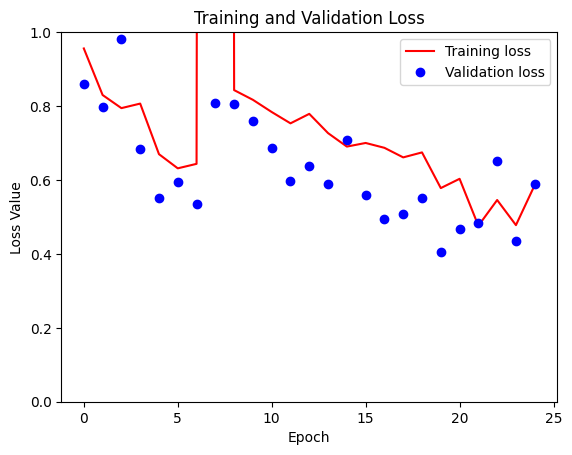

In [29]:
import matplotlib.pyplot as plt

loss = model_unet_history_noClassWeights_drop50.history['loss']
val_loss = model_unet_history_noClassWeights_drop50.history['val_loss']

plt.figure()
plt.plot(model_unet_history_noClassWeights_drop50.epoch, loss, 'r', label='Training loss')
plt.plot(model_unet_history_noClassWeights_drop50.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Visualizing Validation

In [6]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def visualize_images(sat_folder, gt_folder, model_path=None, num_samples=5):
    # Define colors for each class
    class_colors = {
        0: (0, 0, 0),        # unlabeled
        1: (255, 0, 0),      # buildings
        2: (34, 139, 34),    # woodlands
        3: (0, 0, 255),      # water
        4: (184, 115, 51)    # road
    }

    # Get a list of image files in the folders
    sat_files = os.listdir(sat_folder)
    gt_files = os.listdir(gt_folder)

    # Randomly sample image files
    sampled_files = random.sample(sat_files, min(num_samples, len(sat_files)))

    # Plot pairs or triples of images
    for file in sampled_files:
        sat_image_path = os.path.join(sat_folder, file)
        gt_image_path = os.path.join(gt_folder, file.replace('sat_', 'gt_'))

        # Load images
        sat_image = Image.open(sat_image_path)
        gt_image = Image.open(gt_image_path)

        # Convert ground truth image to numpy array
        gt_array = np.array(gt_image)

        # Apply color mapping for ground truth
        gt_colored = np.zeros(gt_array.shape + (3,), dtype=np.uint8)
        for class_label, color in class_colors.items():
            gt_colored[gt_array == class_label] = np.array(color)

        # Create a subplot with 1 or 2 columns based on the presence of the model
        if model_path:
            # Load the model
            model = keras.models.load_model(model_path)
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))

            # Predict using the model
            input_image = np.array(sat_image) / 255.0
            input_example = np.expand_dims(input_image, axis=0)
            predictions = model.predict(input_example)
            predicted_mask = np.argmax(predictions[0], axis=-1)

            # Apply color mapping for prediction
            predicted_colored = np.zeros_like(gt_colored)
            for class_label, color in class_colors.items():
                predicted_colored[predicted_mask == class_label] = np.array(color)

            # Plot the predicted image on the right
            axes[2].imshow(predicted_colored)
            axes[2].set_title('Predicted Image')
            axes[2].axis('off')

        else:
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Plot the satellite image on the left
        axes[0].imshow(sat_image)
        axes[0].set_title('Aerial Image')
        axes[0].axis('off')

        # Plot the ground truth image in the middle
        axes[1].imshow(gt_colored)
        axes[1].set_title('Ground Truth Image')
        axes[1].axis('off')

        plt.show()    

1/1 [==============================] - 0s 369ms/step


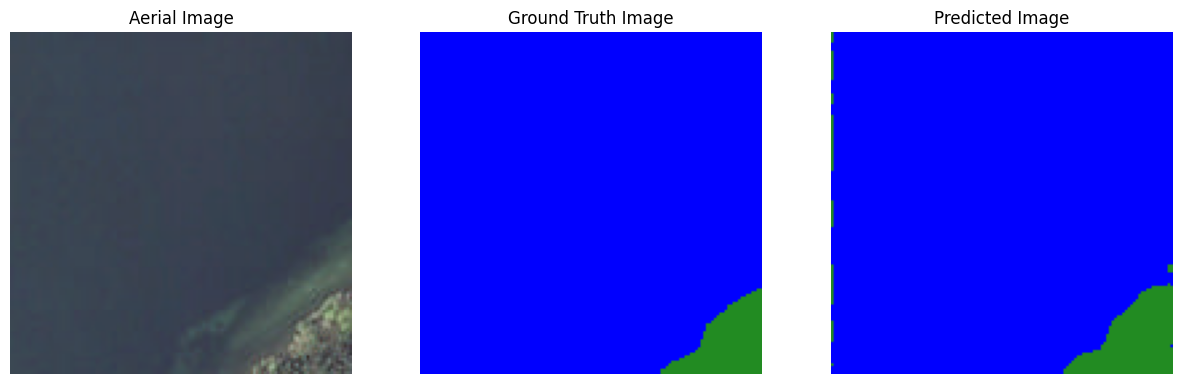

1/1 [==============================] - 0s 364ms/step


1/1 [==============================] - 0s 389ms/step


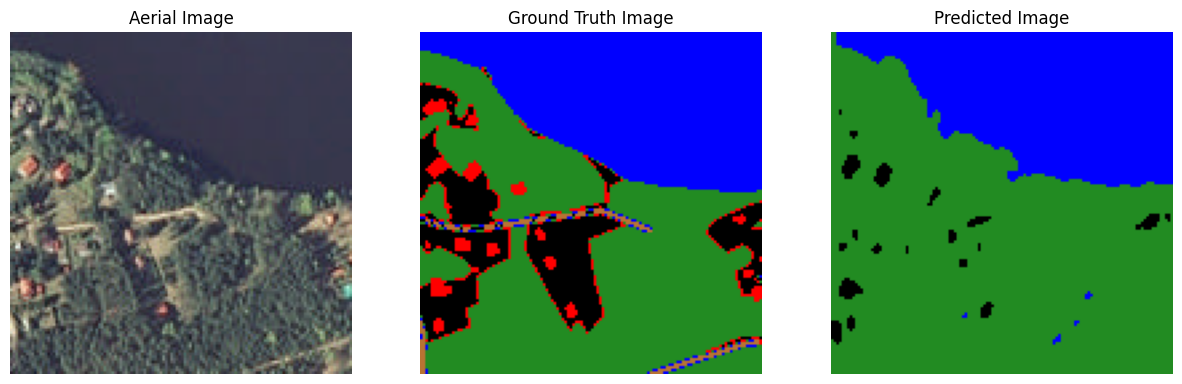

1/1 [==============================] - 0s 364ms/step


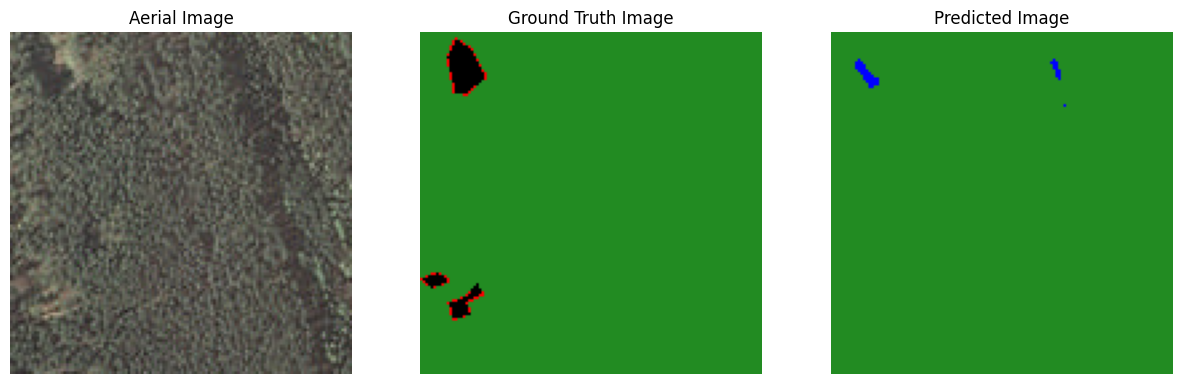

1/1 [==============================] - 0s 385ms/step


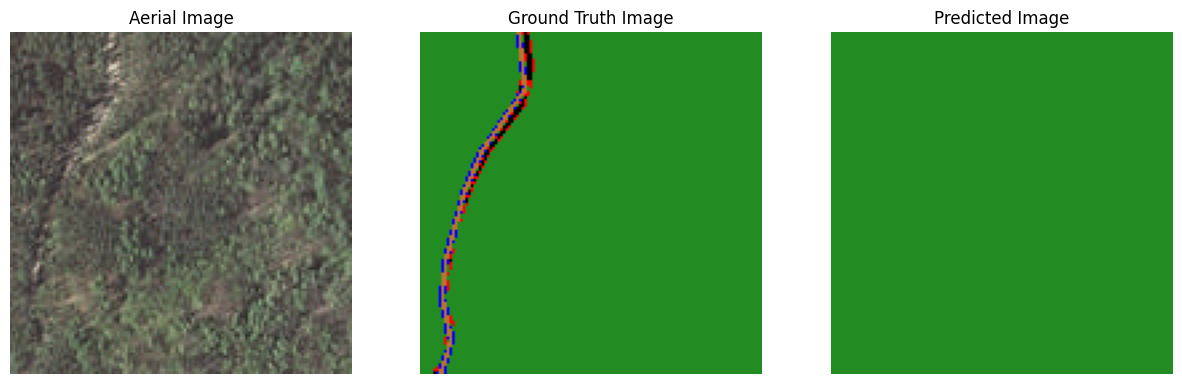

In [31]:
val_sat_folder = "./../Data50_res128_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res128_filtered_20/validate/gt/"

model_path = "./../Model/model_unet_noClassWeights_drop50_18_0.966.keras"
visualize_images(val_sat_folder, val_gt_folder, model_path=model_path, num_samples=5)

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Function to load and preprocess a batch of the dataset
def load_batch(sat_folder, gt_folder, filenames, target_size=(256, 256), num_classes=5):
    input_images = []
    output_masks = []

    for filename in filenames:
        sat_filename = filename
        gt_filename = filename.replace("sat_", "gt_")

        input_path = os.path.join(sat_folder, sat_filename)
        output_path = os.path.join(gt_folder, gt_filename)

        # Load and preprocess input image
        input_image = np.array(Image.open(input_path).resize(target_size)) / 255.0  # Normalize to [0, 1]
        input_images.append(input_image)

        # Load and preprocess output mask
        output_mask = np.array(Image.open(output_path).resize(target_size))
        
        # Ensure that class indices start from 0
        output_mask -= 1

        # Exclude class labels that are not present in the training set
        output_mask[output_mask >= num_classes] = 0

        output_mask = keras.utils.to_categorical(output_mask, num_classes=num_classes)
        output_masks.append(output_mask)

    return np.array(input_images), np.array(output_masks)

# Function to evaluate the model on a folder of images
def evaluate_model_on_folder(model, sat_folder, gt_folder, target_size=(256, 256)):
    # Get a list of image files in the folders
    sat_files = os.listdir(sat_folder)
    gt_files = os.listdir(gt_folder)

    # Ensure the order of files is the same
    sat_files.sort()
    gt_files.sort()

    # Load and preprocess the validation dataset
    X_val, y_val = load_batch(sat_folder, gt_folder, sat_files, target_size=target_size)

    # Predict on validation data
    y_pred = model.predict(X_val)

    # Convert predictions and ground truth to class labels
    y_pred_labels = np.argmax(y_pred, axis=-1)
    y_val_labels = np.argmax(y_val, axis=-1)

    # Flatten the 2D arrays to 1D
    y_pred_flat = y_pred_labels.flatten()
    y_val_flat = y_val_labels.flatten()

    # Define class names
    class_names = ["Unlabeled", "Buildings", "Woodlands", "Water", "Road"]

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_val_flat, y_pred_flat)

    # Display confusion matrix as a heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Display classification report
    print("Classification Report:")
    print(classification_report(y_val_flat, y_pred_flat, target_names=class_names))

2/2 [==============================] - 3s 532ms/step


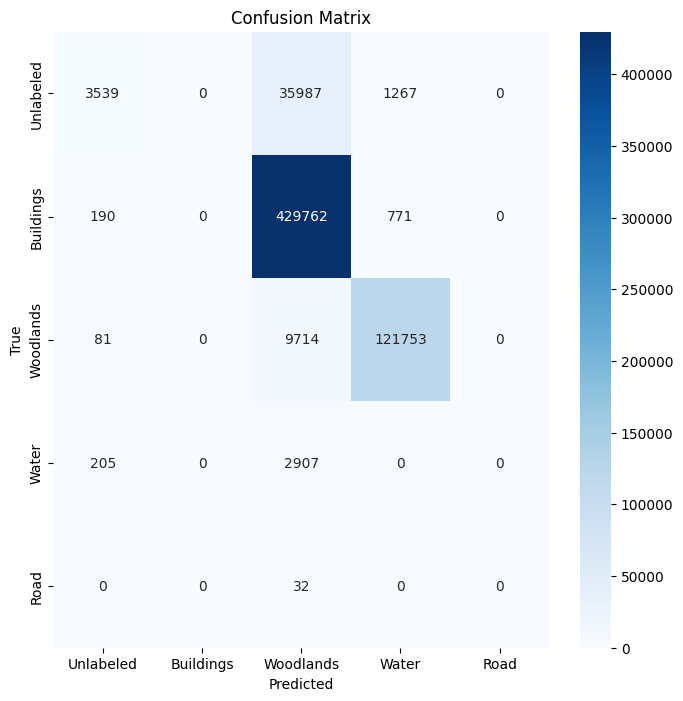

Classification Report:


d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   Unlabeled       0.88      0.09      0.16     40793
   Buildings       0.00      0.00      0.00    430723
   Woodlands       0.02      0.07      0.03    131548
       Water       0.00      0.00      0.00      3112
        Road       0.00      0.00      0.00        32

    accuracy                           0.02    606208
   macro avg       0.18      0.03      0.04    606208
weighted avg       0.06      0.02      0.02    606208



d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
num_classes = 5
input_size = (128, 128, 3)
val_sat_folder = "./../Data50_res128_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res128_filtered_20/validate/gt/"

model_path = "./../Model/model_unet_noClassWeights_drop50_18_0.966.keras"
model = keras.models.load_model(model_path)
evaluate_model_on_folder(model, val_sat_folder, val_gt_folder, (128, 128))

1/1 [==============================] - 0s 383ms/step


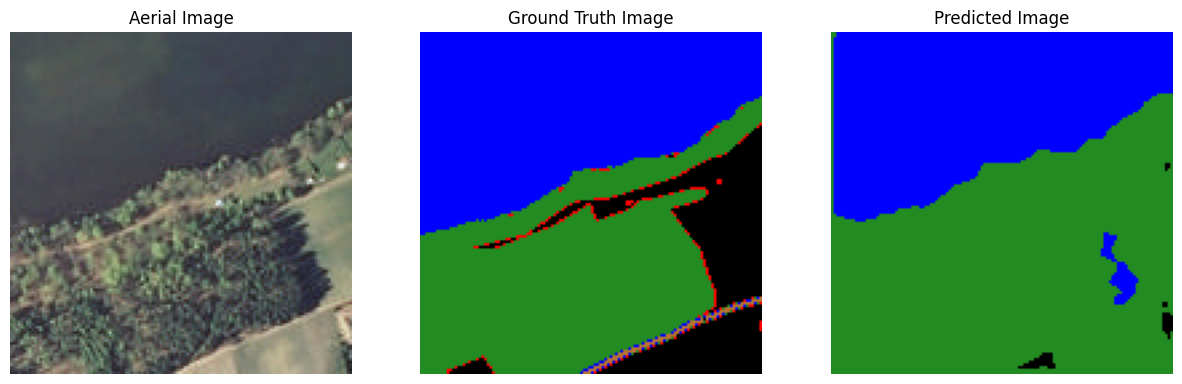

1/1 [==============================] - 0s 372ms/step


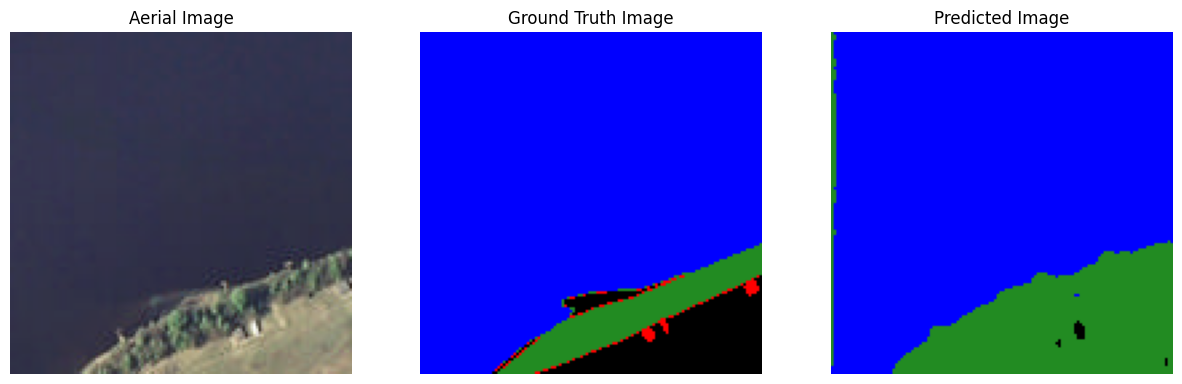

1/1 [==============================] - 0s 337ms/step


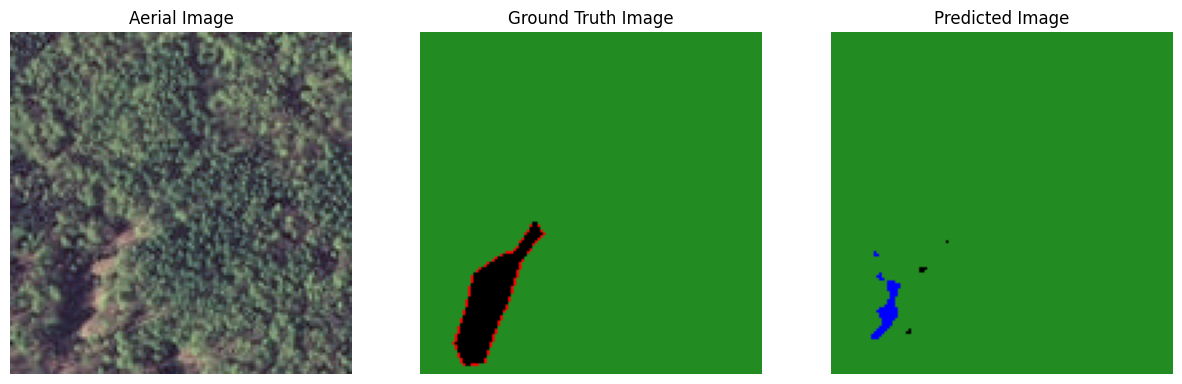

1/1 [==============================] - 0s 373ms/step


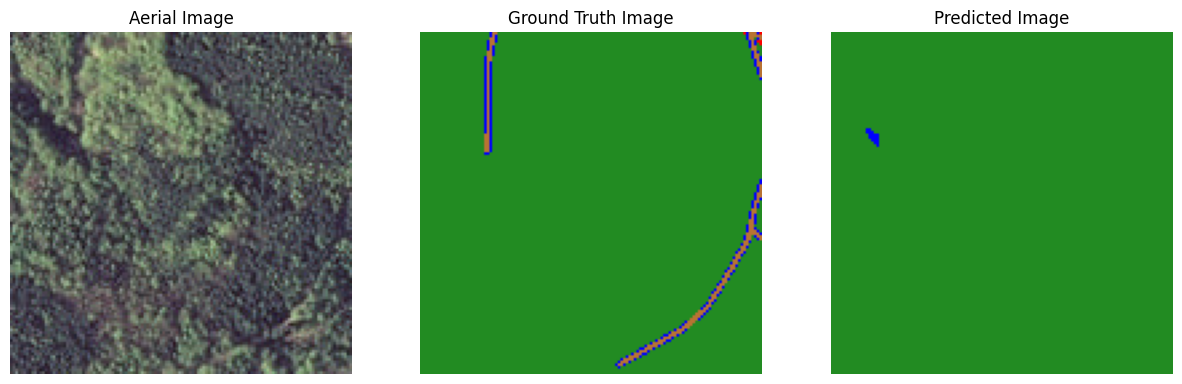

1/1 [==============================] - 0s 387ms/step


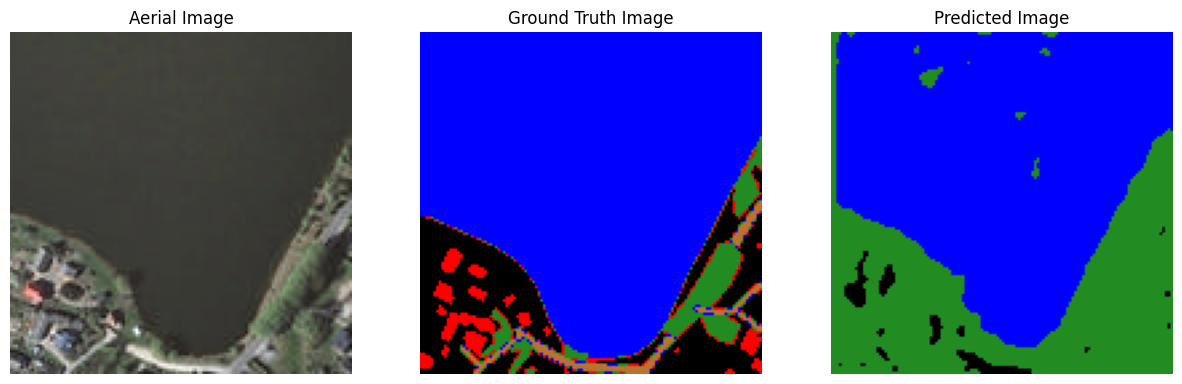

In [34]:
val_sat_folder = "./../Data50_res128_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res128_filtered_20/validate/gt/"

model_path = "./../Model/model_unet_noClassWeights_drop50_18_0.966.keras"
visualize_images(val_sat_folder, val_gt_folder, model_path=model_path, num_samples=5)

# Model Training (input_size = (256, 256, 3))

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.losses import Loss
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = 5
input_size = (256, 256, 3)
batch_size = 1  # You can adjust this based on your available memory
epochs = 25
train_sat_folder = "./../Data50_res256_filtered_20/train/sat/"
train_gt_folder = "./../Data50_res256_filtered_20/train/gt/"

val_sat_folder = "./../Data50_res256_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res256_filtered_20/validate/gt/"

# Function to load and preprocess the dataset
def load_data(sat_folder, gt_folder, batch_size=batch_size):
    input_images = []
    output_masks = []

    filenames = [filename for filename in os.listdir(sat_folder) if filename.endswith(".tif")]
    num_batches = len(filenames) // batch_size

    for batch_idx in tqdm(range(num_batches), desc="Loading batches", unit="batch"):
        batch_filenames = filenames[batch_idx * batch_size : (batch_idx + 1) * batch_size]
        
        batch_inputs = []
        batch_outputs = []
        for filename in batch_filenames:
            input_path = os.path.join(sat_folder, filename)
            output_path = os.path.join(gt_folder, filename.replace("sat_", "gt_"))

            # Load and preprocess input image
            input_image = np.array(Image.open(input_path)) / 255.0  # Normalize to [0, 1]
            batch_inputs.append(input_image)

            # Load and preprocess output mask
            output_mask = np.array(Image.open(output_path))

            # Ensure that class indices are within the range [0, num_classes-1]
            output_mask = np.clip(output_mask, 0, num_classes - 1)
            output_mask = keras.utils.to_categorical(output_mask, num_classes=num_classes)
            batch_outputs.append(output_mask)

        input_images.append(np.array(batch_inputs))
        output_masks.append(np.array(batch_outputs))

    return np.vstack(input_images), np.vstack(output_masks)

# Load and preprocess the training dataset
X_train, y_train = load_data(train_sat_folder, train_gt_folder)

# Load and preprocess the validation dataset
X_val, y_val = load_data(val_sat_folder, val_gt_folder)

def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.5)(p)
   return f, p

def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.5)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)
   return x

# Define U-Net model for 5 classes
def unet_model(input_size=(256, 256, 3), num_classes=5):
    inputs = keras.Input(input_size)
    
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    # outputs
    outputs = layers.Conv2D(num_classes, 1, padding="same", activation = "softmax")(u9)
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net_256")
    return unet_model

class_weight = {0: .59, 1: .32, 2: .06, 3: .02, 4: .01}

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),
      keras.metrics.CategoricalCrossentropy(name='cat_cross_entropy'),
      keras.metrics.MeanIoU(name='mIoU', num_classes=num_classes),
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Initialize and compile the model
model_unet_noClassWeights_drop50_256 = unet_model(num_classes=num_classes)
model_unet_noClassWeights_drop50_256.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'model_unet_noClassWeights_drop50_256_{epoch:02d}_{val_accuracy:.3f}.keras',
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,
    save_weights_only=False,  # Save entire model
    mode='max',  # Save the model with the highest validation accuracy
    verbose=1
)

Loading batches: 100%|██████████| 36/36 [00:00<00:00, 154.52batch/s]


In [2]:
# Train the model without class weights but with checkpoint callbacks
model_unet_history_noClassWeights_drop50_256 = model_unet_noClassWeights_drop50_256.fit(
        X_train, y_train,
        epochs=50,
        batch_size=1,
        validation_data=(X_val, y_val),
        #class_weight=class_weight,
        callbacks=[checkpoint, early_stopping]
    )

Epoch 1/50

174/174 [==============================] - ETA: 0s - loss: 1.6138 - cross entropy: 0.6092 - cat_cross_entropy: 1.6138 - mIoU: 0.4031 - Brier score: 0.0977 - tp: 6865298.0000 - fp: 3230498.0000 - tn: 42382552.0000 - fn: 4537966.0000 - accuracy: 0.8637 - precision: 0.6800 - recall: 0.6020 - auc: 0.8958 - prc: 0.6479
Epoch 1: val_accuracy improved from -inf to 0.88524, saving model to model_unet_noClassWeights_drop50_256_01_0.885.keras
174/174 [==============================] - 439s 2s/step - loss: 1.6138 - cross entropy: 0.6092 - cat_cross_entropy: 1.6138 - mIoU: 0.4031 - Brier score: 0.0977 - tp: 6865298.0000 - fp: 3230498.0000 - tn: 42382552.0000 - fn: 4537966.0000 - accuracy: 0.8637 - precision: 0.6800 - recall: 0.6020 - auc: 0.8958 - prc: 0.6479 - val_loss: 0.7682 - val_cross entropy: 0.4592 - val_cat_cross_entropy: 0.7682 - val_mIoU: 0.4000 - val_Brier score: 0.0772 - val_tp: 1667273.0000 - val_fp: 661799.0000 - val_tn: 8775385.0000 - val_fn: 692023.0000 - val_accuracy: 

Model: "U-Net_256"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                       

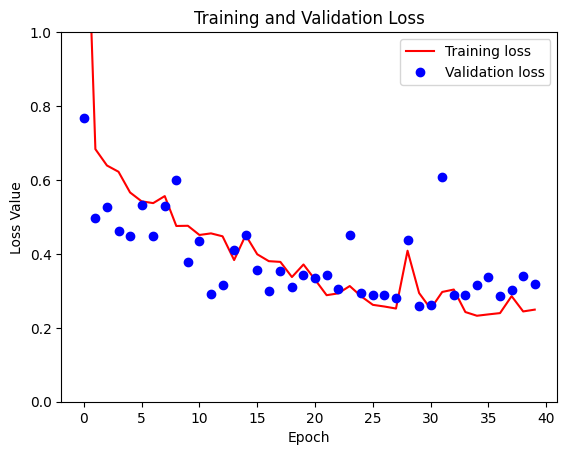

In [3]:
import matplotlib.pyplot as plt
model_unet_noClassWeights_drop50_256.summary()

loss = model_unet_history_noClassWeights_drop50_256.history['loss']
val_loss = model_unet_history_noClassWeights_drop50_256.history['val_loss']

plt.figure()
plt.plot(model_unet_history_noClassWeights_drop50_256.epoch, loss, 'r', label='Training loss')
plt.plot(model_unet_history_noClassWeights_drop50_256.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

2/2 [==============================] - 12s 1s/step


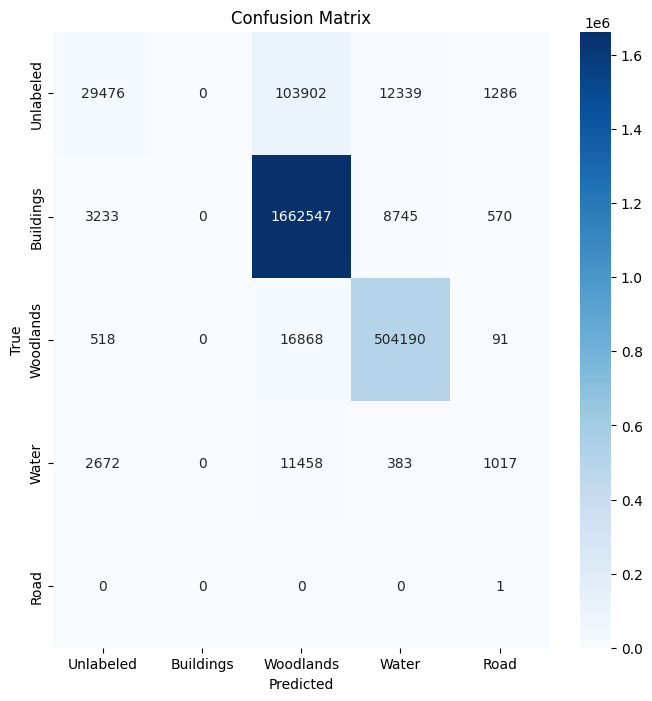

Classification Report:


d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\GIT\ML_Zoomcamp_2023_Capstone2_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

   Unlabeled       0.82      0.20      0.32    147003
   Buildings       0.00      0.00      0.00   1675095
   Woodlands       0.01      0.03      0.01    521667
       Water       0.00      0.02      0.00     15530
        Road       0.00      1.00      0.00         1

    accuracy                           0.02   2359296
   macro avg       0.17      0.25      0.07   2359296
weighted avg       0.05      0.02      0.02   2359296

1/1 [==============================] - 1s 661ms/step


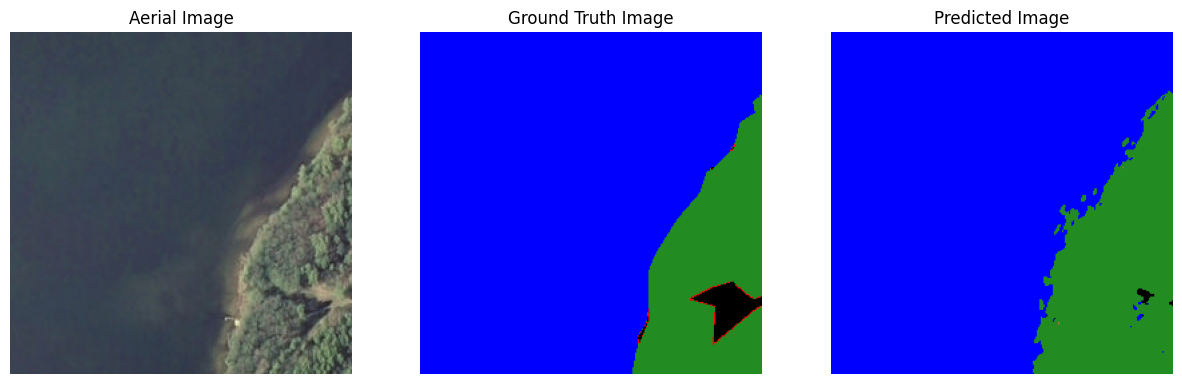

1/1 [==============================] - 1s 579ms/step


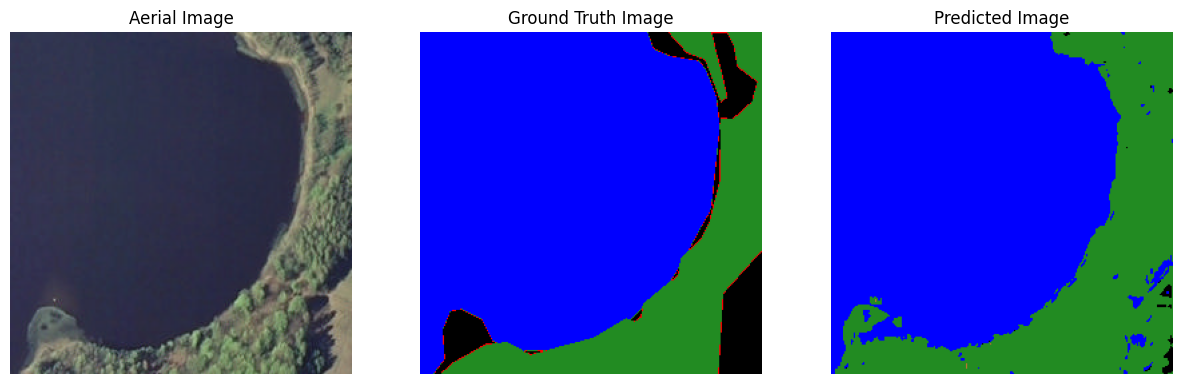

1/1 [==============================] - 1s 701ms/step


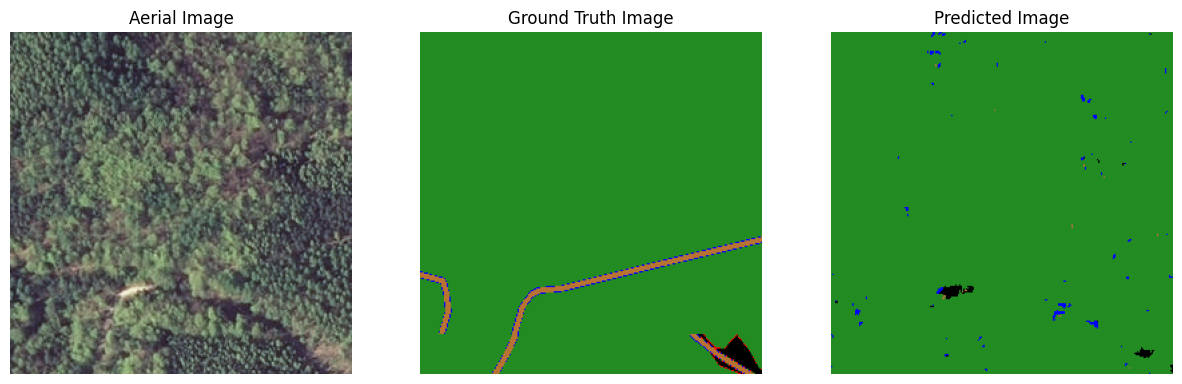

1/1 [==============================] - 1s 607ms/step


1/1 [==============================] - 1s 605ms/step


In [7]:
val_sat_folder = "./../Data50_res256_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res256_filtered_20/validate/gt/"

model_path = "./../Model/model_unet_noClassWeights_drop50_256_30_0.972.keras"
evaluate_model_on_folder(model_unet_noClassWeights_drop50_256, val_sat_folder, val_gt_folder, (256, 256))
visualize_images(val_sat_folder, val_gt_folder, model_path=model_path, num_samples=5)

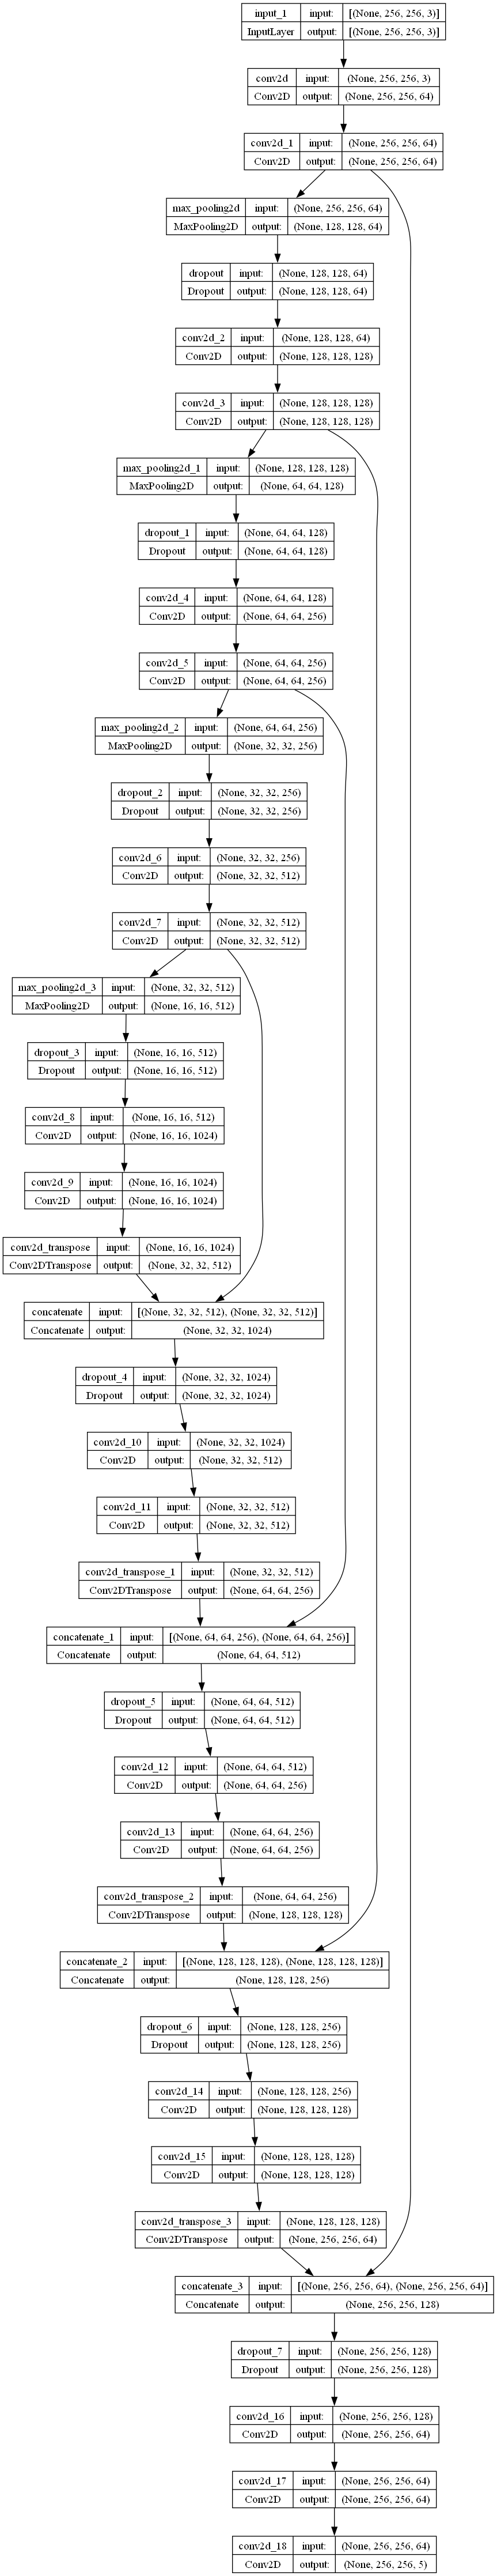

In [11]:
keras.utils.plot_model(
    model_unet_noClassWeights_drop50_256,
    #to_file="model_unet.png",
    show_shapes=True,
    #show_dtype=True,
    #show_layer_names=True,
    #rankdir="LR",  # horizontal layout
    #rankdir="TB", # vertical layout
    #expand_nested=False,
    #dpi=200,
    #show_layer_activations=True,
    #show_trainable=True
)

# Model Training (input_size = (512, 512, 3))

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from PIL import Image
#from tensorflow.keras.metrics import MeanIoU
#from tensorflow.keras.losses import Loss
#from sklearn.utils.class_weight import compute_class_weight

#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = 5
input_size = (512, 512, 3)
batch_size = 1  # You can adjust this based on your available memory
epochs = 10
train_sat_folder = "./../Data50_res512_filtered_20/train/sat/"
train_gt_folder = "./../Data50_res512_filtered_20/train/gt/"

val_sat_folder = "./../Data50_res512_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res512_filtered_20/validate/gt/"

# Function to load and preprocess the dataset
def load_data(sat_folder, gt_folder, batch_size=batch_size):
    input_images = []
    output_masks = []

    filenames = [filename for filename in os.listdir(sat_folder) if filename.endswith(".tif")]
    num_batches = len(filenames) // batch_size

    for batch_idx in tqdm(range(num_batches), desc="Loading batches", unit="batch"):
        batch_filenames = filenames[batch_idx * batch_size : (batch_idx + 1) * batch_size]
        
        batch_inputs = []
        batch_outputs = []
        for filename in batch_filenames:
            input_path = os.path.join(sat_folder, filename)
            output_path = os.path.join(gt_folder, filename.replace("sat_", "gt_"))

            # Load and preprocess input image
            input_image = np.array(Image.open(input_path)) / 255.0  # Normalize to [0, 1]
            batch_inputs.append(input_image)

            # Load and preprocess output mask
            output_mask = np.array(Image.open(output_path))

            # Ensure that class indices are within the range [0, num_classes-1]
            output_mask = np.clip(output_mask, 0, num_classes - 1)
            output_mask = keras.utils.to_categorical(output_mask, num_classes=num_classes)
            batch_outputs.append(output_mask)

        input_images.append(np.array(batch_inputs))
        output_masks.append(np.array(batch_outputs))

    return np.vstack(input_images), np.vstack(output_masks)

# Load and preprocess the training dataset
X_train, y_train = load_data(train_sat_folder, train_gt_folder)

# Load and preprocess the validation dataset
X_val, y_val = load_data(val_sat_folder, val_gt_folder)

def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.5)(p)
   return f, p

def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.5)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)
   return x

# Define U-Net model for 5 classes
def unet_model(input_size=(256, 256, 3), num_classes=5):
    inputs = keras.Input(input_size)
    
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    # outputs
    outputs = layers.Conv2D(num_classes, 1, padding="same", activation = "softmax")(u9)
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net_256")
    return unet_model

class_weight = {0: .59, 1: .32, 2: .06, 3: .02, 4: .01}

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),
      keras.metrics.CategoricalCrossentropy(name='cat_cross_entropy'),
      keras.metrics.MeanIoU(name='mIoU', num_classes=num_classes),
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Initialize and compile the model
model_unet_noClassWeights_drop50_512 = unet_model((512, 512, 3), num_classes=num_classes)
model_unet_noClassWeights_drop50_512.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'model_unet_noClassWeights_drop50_512_{epoch:02d}_{val_accuracy:.3f}.keras',
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,
    save_weights_only=False,  # Save entire model
    mode='max',  # Save the model with the highest validation accuracy
    verbose=1
)

Loading batches: 100%|██████████| 36/36 [00:00<00:00, 54.53batch/s]


In [2]:
# Train the model without class weights but with checkpoint callbacks
model_unet_history_noClassWeights_drop50_512 = model_unet_noClassWeights_drop50_512.fit(
        X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_val, y_val),
        #class_weight=class_weight,
        callbacks=[checkpoint, early_stopping]
    )

Epoch 1/10

172/172 [==============================] - ETA: 0s - loss: 0.9155 - cross entropy: 0.9342 - cat_cross_entropy: 0.9155 - mIoU: 0.4000 - Brier score: 0.0994 - tp: 26146180.0000 - fp: 11514015.0000 - tn: 168841072.0000 - fn: 18942584.0000 - accuracy: 0.8649 - precision: 0.6943 - recall: 0.5799 - auc: 0.8938 - prc: 0.6271
Epoch 1: val_accuracy improved from -inf to 0.88231, saving model to model_unet_noClassWeights_drop50_512_01_0.882.keras
172/172 [==============================] - 1782s 10s/step - loss: 0.9155 - cross entropy: 0.9342 - cat_cross_entropy: 0.9155 - mIoU: 0.4000 - Brier score: 0.0994 - tp: 26146180.0000 - fp: 11514015.0000 - tn: 168841072.0000 - fn: 18942584.0000 - accuracy: 0.8649 - precision: 0.6943 - recall: 0.5799 - auc: 0.8938 - prc: 0.6271 - val_loss: 0.8649 - val_cross entropy: 0.7803 - val_cat_cross_entropy: 0.8649 - val_mIoU: 0.4000 - val_Brier score: 0.0942 - val_tp: 6439847.0000 - val_fp: 2555921.0000 - val_tn: 35192816.0000 - val_fn: 2997337.0000 - v

Model: "U-Net_256"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 256, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                       

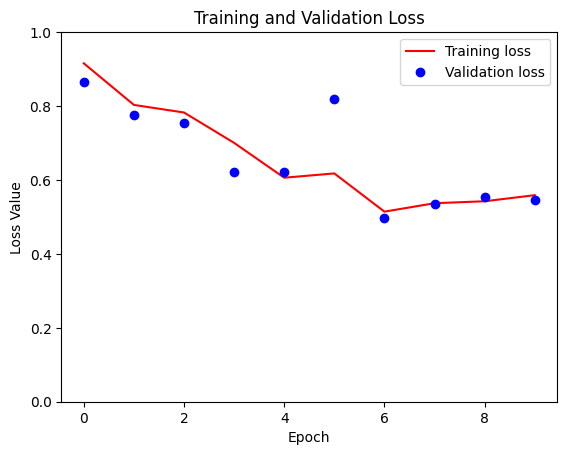

In [3]:
import matplotlib.pyplot as plt
model_unet_noClassWeights_drop50_512.summary()

loss = model_unet_history_noClassWeights_drop50_512.history['loss']
val_loss = model_unet_history_noClassWeights_drop50_512.history['val_loss']

plt.figure()
plt.plot(model_unet_history_noClassWeights_drop50_512.epoch, loss, 'r', label='Training loss')
plt.plot(model_unet_history_noClassWeights_drop50_512.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [11]:
val_sat_folder = "./../Data50_res512_filtered_20/validate/sat/"
val_gt_folder = "./../Data50_res512_filtered_20/validate/gt/"

model_path = "./../Model/model_unet_noClassWeights_drop50_512_07_0.952.keras"
#evaluate_model_on_folder(model_unet_noClassWeights_drop50_512, val_sat_folder, val_gt_folder, (512, 512))

1/1 [==============================] - 2s 2s/step


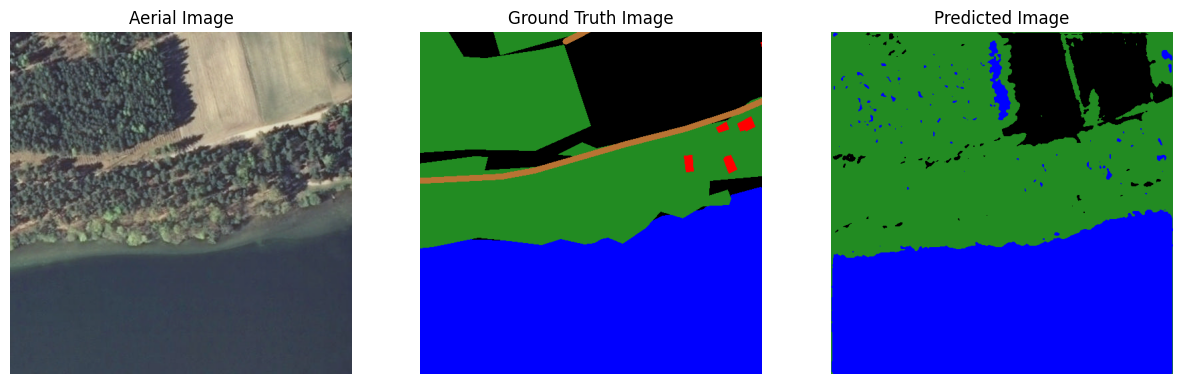

1/1 [==============================] - 2s 2s/step


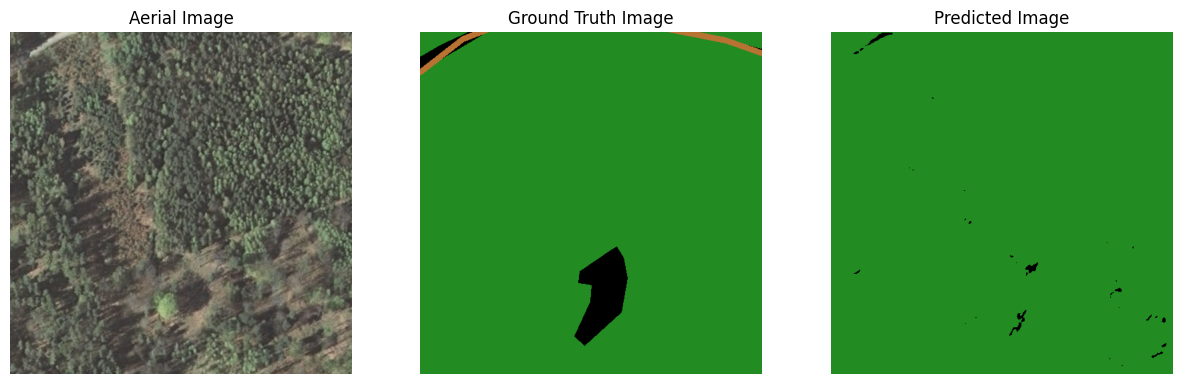

1/1 [==============================] - 2s 2s/step


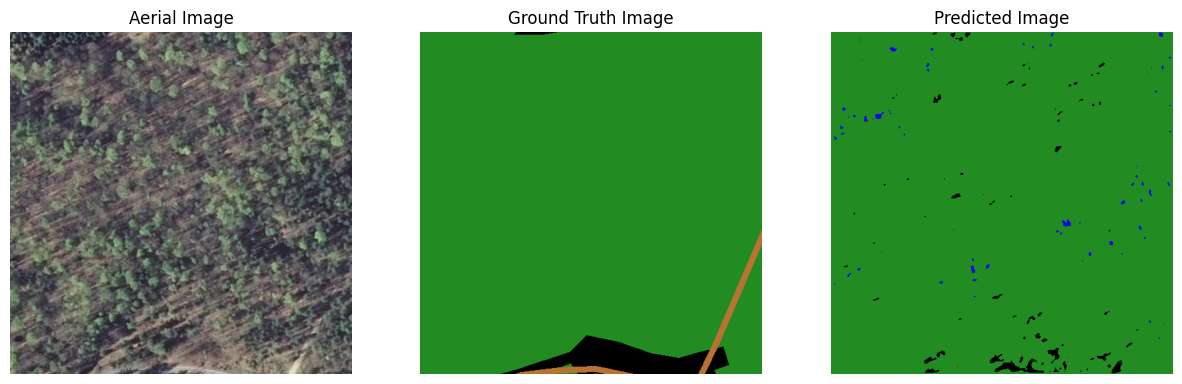

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


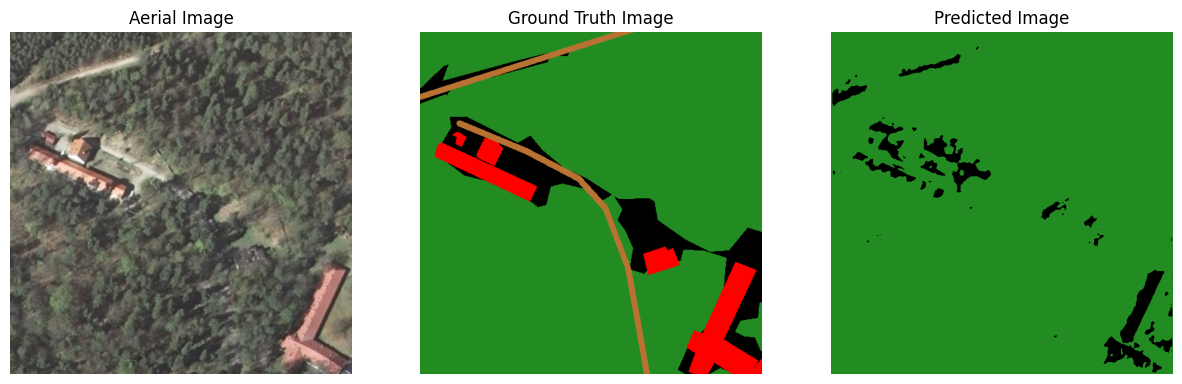

In [10]:
visualize_images(val_sat_folder, val_gt_folder, model_path=model_path, num_samples=5)